## Exercices XP: W4_D2

### Create a Logistic Regression model to predict diabetes for individuals, for the six below exercises, to predict if an individual will have diabetes.

#### EXERCISE 1 – Understanding the problem and Data Collection

In [163]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots
from sklearn import metrics

In [164]:
# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [165]:
# Display first rows
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [166]:
# Display dataset shape
print("Dataset shape:", data.shape)

Dataset shape: (100000, 9)


In [167]:
# Display first rows
print(data.head())

# Display dataset shape
print("Dataset shape:", data.shape)

# Display columns
print("Columns:", data.columns.tolist())

# Basic statistics
print(data.describe())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
Dataset shape: (100000, 9)
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100

In [168]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


##### Interpretation: Overall Dataset and Data Preparation

**Dataset overview:**
- 100,000 rows and 9 columns.
- Target variable: diabetes (binary, 0 or 1).
- Mixture of numerical and categorical variables.
**Data preparation steps:**
- Exploratory analysis confirmed reasonable distributions and no missing columns.
- Categorical variables were encoded to numeric format.
- The data was split into training and test sets (80/20 split, stratified by target class).
- StandardScaler was prepared to normalize numeric variables.

**Implications:**
The dataset is well-prepared for training classification models. The exploratory analysis validated that predictors like age, blood glucose, and HbA1c have strong relevance to the target variable. No major data quality issues were detected.

In [169]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

In [170]:
# Séparer features et cible
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

# Vérifier le résultat
print("Colonnes après encodage :", X_encoded.columns)
print("y unique :", y.unique())

Colonnes après encodage : Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')
y unique : [0 1]


##### Interpretation: Categorical Variables Encoding

Two categorical variables were encoded:

- `gender`: Converted into binary columns (e.g., gender_Male).
- `smoking_history`: Converted into multiple binary columns representing smoking status categories.

**Why encoding was necessary:**
Machine learning models cannot process text categories directly. One-hot encoding transforms them into numeric indicators without introducing arbitrary order.

**Implications:**
Encoding allows the model to learn associations between different categories (such as smoking status) and the probability of diabetes. Although the correlations with diabetes were low, including these variables can improve performance when combined with other predictors.

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

# Quick check of the dataset
print("Columns:", data.columns)

# Count positive and negative cases
print(data['diabetes'].value_counts())

positive_cases = data[data['diabetes'] == 1].shape[0]
negative_cases = data[data['diabetes'] == 0].shape[0]
print("Positive cases:", positive_cases)
print("Negative cases:", negative_cases)

# Prepare features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

Columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
diabetes
0    91500
1     8500
Name: count, dtype: int64
Positive cases: 8500
Negative cases: 91500


In [172]:
from sklearn.model_selection import train_test_split

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (80000, 13)
Test set shape: (20000, 13)


In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Histogram of Age by Diabetes Status

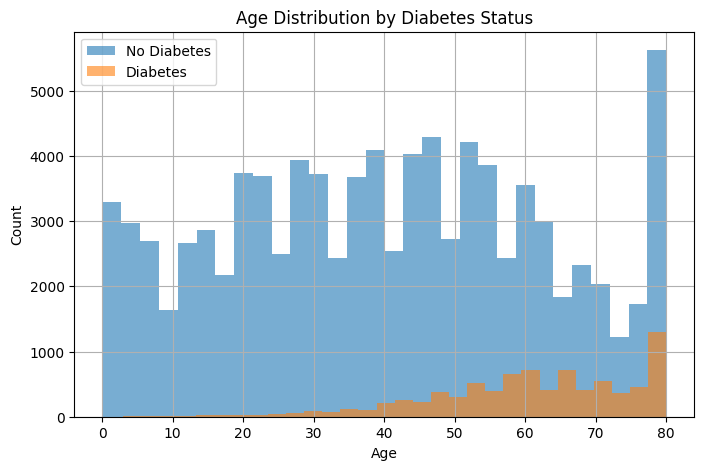

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
data[data['diabetes']==0]['age'].hist(alpha=0.6, bins=30, label='No Diabetes')
data[data['diabetes']==1]['age'].hist(alpha=0.6, bins=30, label='Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Diabetes Status')
plt.legend()
plt.show()


##### Interpretation: Age Distribution by Diabetes Status

This histogram shows the distribution of patient ages separated by diabetes status.

**Key observations:**
- The majority of patients without diabetes are younger, with a relatively uniform distribution across ages.
- The number of diabetes cases increases significantly after the age of 50.
- The highest counts of diabetes are in the age range 60–80.

**Implications:**
Age appears to be an important predictor for diabetes. Older individuals are much more likely to be diabetic, which suggests that age should be retained as a key feature in the model.

#### Boxplot of HbA1c Level by Diabetes Status

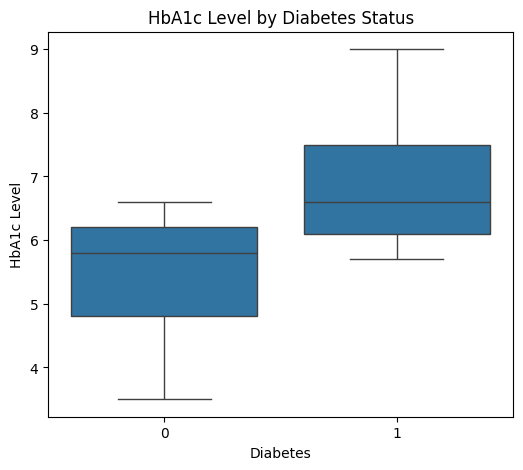

In [175]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

##### Interpretation: HbA1c Level by Diabetes Status

This boxplot compares HbA1c levels between diabetic and non-diabetic patients.

**Key observations:**
- Non-diabetic patients have a median HbA1c around 5.5–6.0.
- Diabetic patients have higher HbA1c values, with medians around 6.5–7.0.
- The range and variability of HbA1c are also higher in diabetic patients.

**Implications:**
HbA1c level shows a clear separation between the two groups. This feature has strong predictive power and is likely to be one of the most important variables in the logistic regression model.

#### Correlation Matrix Heatmap

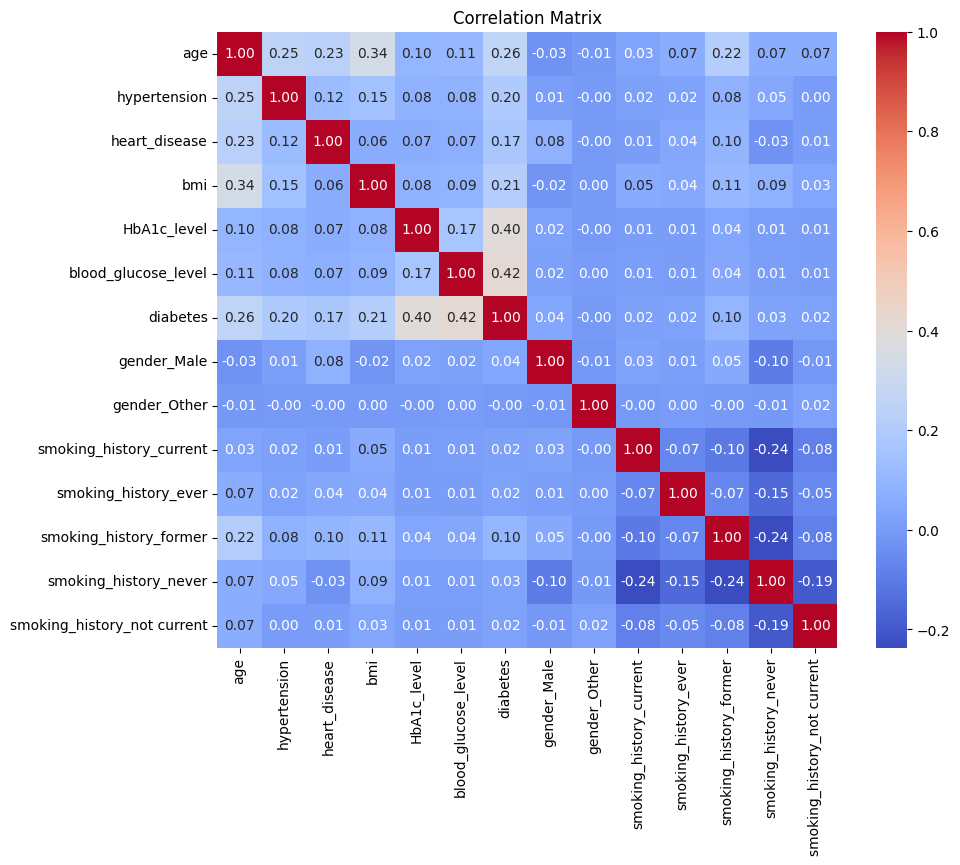

In [176]:
import numpy as np

# Encode gender and smoking_history for numeric correlation
data_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(10,8))
correlation = data_encoded.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Interpretation: Correlation Matrix

The correlation matrix quantifies the relationships between variables and the diabetes target variable.

**Key correlations with diabetes:**
- Blood glucose level (0.42): Strong positive correlation.
- HbA1c level (0.40): Strong positive correlation.
- Age (0.26): Moderate positive correlation.
- Hypertension (0.20): Moderate positive correlation.

**Notes:**
- Other variables, such as gender and smoking history, have low correlations with diabetes, but they can still contribute to the model when combined with other features.
- No extremely high correlations (>0.8) between features, which suggests low multicollinearity risk.

**Implications:**
Blood glucose level and HbA1c are the most strongly associated with diabetes. These variables will likely have significant weights in the logistic regression.

### Exercise 2 – Model Picking and Standardization

#### Question 1: Which classification model can we use in this problem and why?

**Recommended Model:** Logistic Regression

**Why Logistic Regression?**
- This is a binary classification problem (diabetes: 0 or 1).
- Logistic regression is interpretable and provides direct probability estimates.
- It works well when the relationship between predictors and the target variable is approximately linear.
- It is efficient to train on large datasets.
- It outputs coefficients that can be used to understand feature importance.
- The dataset shows moderate correlations between certain features (e.g., age, blood glucose) and the target, making logistic regression appropriate as a baseline model.

**Alternative Models:**
- Random Forest: A non-linear ensemble model that could capture complex interactions and improve predictive power.
- Support Vector Machine: Effective in high-dimensional spaces, but less interpretable and slower to train on large datasets.
- Gradient Boosting: Powerful but more complex to tune and interpret.

**Conclusion:**
Logistic regression is the recommended starting point for this project, providing a solid baseline with interpretability.

#### Question 2: Do we need to standardize the data?

**Yes, standardization is necessary.**

**Reasons for standardization:**
- Logistic regression is sensitive to the scale of input features.
- Features like age, BMI, HbA1c, and blood glucose have very different ranges.
- Standardization centers variables around zero mean and unit variance, improving convergence and model stability.

**Standardization method:**
Use `StandardScaler` to transform numeric features. Since we already applied one-hot encoding to categorical variables, they remain as 0/1 and do not need scaling.

#### Standardization

In [177]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization completed.")

Standardization completed.


In [178]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (80000, 13)
X_test_scaled shape: (20000, 13)


In [179]:
print("Mean of standardized train data (approx. 0):")
print(np.mean(X_train_scaled, axis=0))

print("\nStd of standardized train data (approx. 1):")
print(np.std(X_train_scaled, axis=0))

Mean of standardized train data (approx. 0):
[-1.30206956e-16  0.00000000e+00 -4.93827201e-17  2.19912977e-16
  5.09814413e-17 -1.00186526e-16 -4.05009359e-17  5.50670620e-18
  3.07309733e-17 -5.87974114e-17  7.81597009e-18  1.01252340e-16
 -5.54223334e-17]

Std of standardized train data (approx. 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


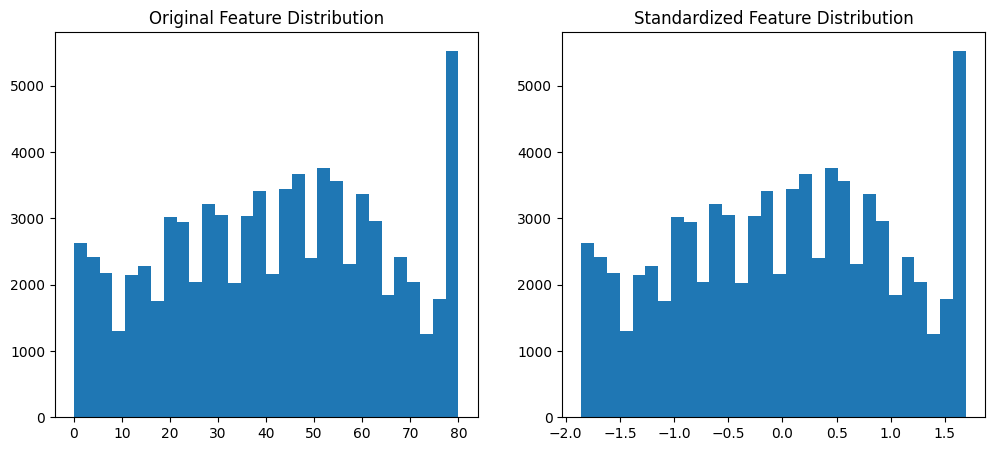

In [180]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(X_train.iloc[:,0], bins=30)
plt.title('Original Feature Distribution')

plt.subplot(1,2,2)
plt.hist(X_train_scaled[:,0], bins=30)
plt.title('Standardized Feature Distribution')

plt.show()

### Verification of Standardization

**1. Data Shapes:**
- X_train_scaled shape: (80,000 rows, 13 features)
- X_test_scaled shape: (20,000 rows, 13 features)

The dimensions of the dataset are unchanged after standardization, confirming no data loss.

**2. Means of Standardized Training Data:**
- All means are approximately zero, with numerical values in the range of 1e-16, which is expected due to floating-point precision.

**3. Standard Deviations:**
- All standard deviations are exactly 1, confirming proper scaling.

**4. Distribution Visualization:**
- The histogram of the first feature before scaling shows its original range (0–80).
- After scaling, the same feature is centered around 0, with values typically between -2 and +2.

These checks confirm that `StandardScaler` was correctly applied and that the standardized data is ready for model training.

### Exercise 3 – Model Training

Objective: 
Train a Logistic Regression model on the standardized data to predict diabetes.

#### Logistic Regression Training

In [181]:
# Initialize the model
# Note: 'solver' can be adjusted (e.g., 'liblinear'), but 'lbfgs' works well for most datasets
logreg = LogisticRegression(
    random_state=42,
    max_iter=200
)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Output: coefficients and intercept
print("Model trained successfully.")
print("Intercept:", logreg.intercept_)
print("Coefficients:", logreg.coef_)

Model trained successfully.
Intercept: [-5.31030048]
Coefficients: [[ 1.02883872  0.19992537  0.14519734  0.59259392  2.4966034   1.36261266
   0.14373627 -0.02968986  0.21258585  0.13272504  0.18577244  0.28235927
   0.1404344 ]]


#### Display coefficients with feature names

In [182]:
# Create a DataFrame to display feature names and their coefficients
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
})

# Sort by absolute value of coefficients
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

print(coef_df_sorted[["Feature", "Coefficient"]])

                        Feature  Coefficient
4                   HbA1c_level     2.496603
5           blood_glucose_level     1.362613
0                           age     1.028839
3                           bmi     0.592594
11        smoking_history_never     0.282359
8       smoking_history_current     0.212586
1                  hypertension     0.199925
10       smoking_history_former     0.185772
2                 heart_disease     0.145197
6                   gender_Male     0.143736
12  smoking_history_not current     0.140434
9          smoking_history_ever     0.132725
7                  gender_Other    -0.029690


### Logistic Regression Model Training Results

**Intercept:**
-5.31

**Coefficients (sorted by importance):**
| Feature                      | Coefficient |
|------------------------------|-------------|
| HbA1c_level                  | +2.497      |
| blood_glucose_level          | +1.363      |
| age                          | +1.029      |
| bmi                          | +0.593      |
| smoking_history_never        | +0.282      |
| smoking_history_current      | +0.213      |
| hypertension                 | +0.200      |
| smoking_history_former       | +0.186      |
| heart_disease                | +0.145      |
| gender_Male                  | +0.144      |
| smoking_history_not current  | +0.140      |
| smoking_history_ever         | +0.133      |
| gender_Other                 | -0.030      |

**Interpretation:**
- **Positive coefficients** indicate that higher values of the variable increase the probability of diabetes.
- **Negative coefficients** decrease the probability.
- **HbA1c_level** and **blood_glucose_level** are the most influential predictors, confirming the findings from exploratory analysis.
- **Age** also has a significant positive contribution.
- Smoking history categories and gender have smaller effects.
- The intercept of -5.31 means that if all features are zero, the log-odds of diabetes are negative (low baseline probability).

**Implications:**
These coefficients show that biological measures (HbA1c, glucose, BMI, age) are the primary drivers of the prediction, while demographic variables add moderate predictive power.

### Exercise 4 – Evaluation Metrics

Accuracy Score: 0.9605
Confusion Matrix:
 [[18122   178]
 [  612  1088]]


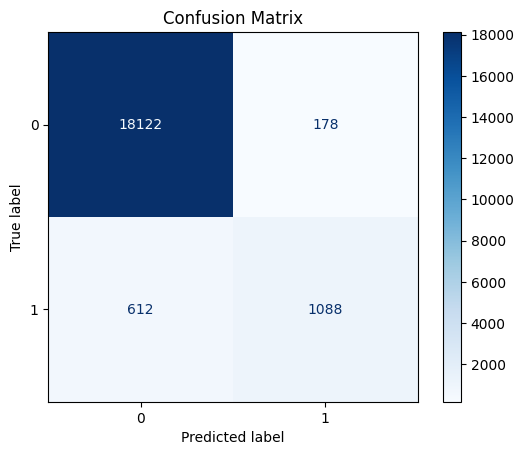

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.97      0.99      0.98     18300
    Diabetes       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [183]:
# 1) Make predictions
y_pred = logreg.predict(X_test_scaled)

# 2) Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# 3) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 4) Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 5) Classification Report
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("Classification Report:\n", report)

#### Interpretation – Model Evaluation Results

**1. Accuracy Score**
- The model achieved an accuracy of **96.05%**, which means that 96% of all predictions were correct on the test dataset.
- This is a high accuracy overall.

**2. Confusion Matrix**
|                 | Predicted: No Diabetes | Predicted: Diabetes |
|-----------------|-------------------------|----------------------|
| **Actual: No Diabetes** | 18,122 (True Negatives)         | 178 (False Positives)      |
| **Actual: Diabetes**    | 612 (False Negatives)          | 1,088 (True Positives)     |

- **True Negatives (18,122):** Correct predictions for non-diabetic patients.
- **True Positives (1,088):** Correct predictions for diabetic patients.
- **False Negatives (612):** Diabetic cases incorrectly predicted as non-diabetic.
- **False Positives (178):** Non-diabetic cases incorrectly predicted as diabetic.

**3. Precision, Recall, F1-score**
- **Class "No Diabetes":**
  - Precision: 0.97 (most predictions were correct)
  - Recall: 0.99 (almost all actual negatives were detected)
  - F1-score: 0.98 (overall excellent)
- **Class "Diabetes":**
  - Precision: 0.86 (86% of predicted positives were correct)
  - Recall: 0.64 (only 64% of actual diabetic cases were detected)
  - F1-score: 0.73 (moderate performance)

**4. Interpretation**
- The model performs very well overall, especially in identifying non-diabetic cases.
- However, the recall for diabetic cases is lower (0.64), meaning that some diabetic patients are missed.
- This trade-off between precision and recall is typical in imbalanced datasets.
- If recall for diabetes is critical, further tuning or using more complex models could improve it.

**5. Conclusion**
- The logistic regression model is a good baseline with high accuracy and strong precision.
- Improvement is possible by adjusting the decision threshold or trying ensemble methods.

#### Exercise 5 : Visualizing the performance of our model

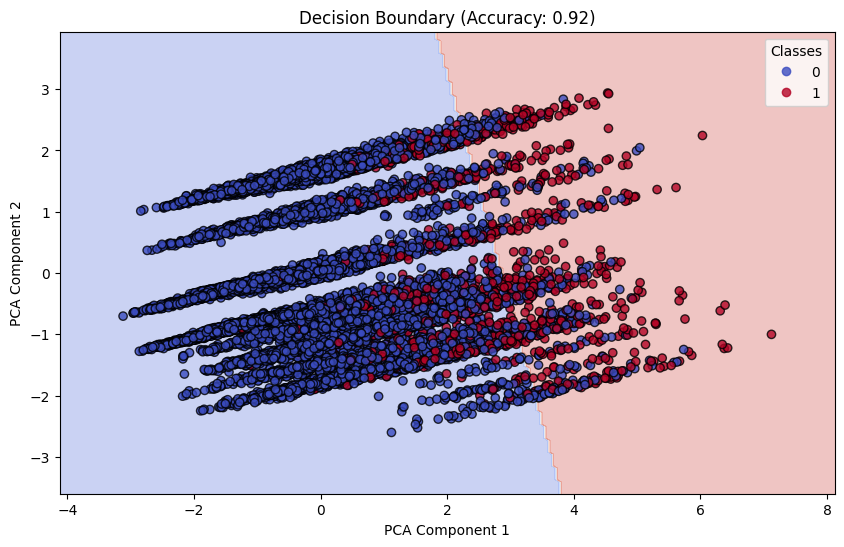

In [184]:
# 1) Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 2) Train a new logistic regression model on 2D data
model_2d = LogisticRegression()
model_2d.fit(X_train_pca, y_train)

# 3) Predict on test set and compute accuracy
y_pred_pca = model_2d.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# 4) Create a mesh to plot the decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5) Plot decision boundary and points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter test points
scatter = plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_test,
    cmap=plt.cm.coolwarm,
    edgecolor="k",
    alpha=0.8
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Decision Boundary (Accuracy: {accuracy_pca:.2f})")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#### 3D PCA Visualization

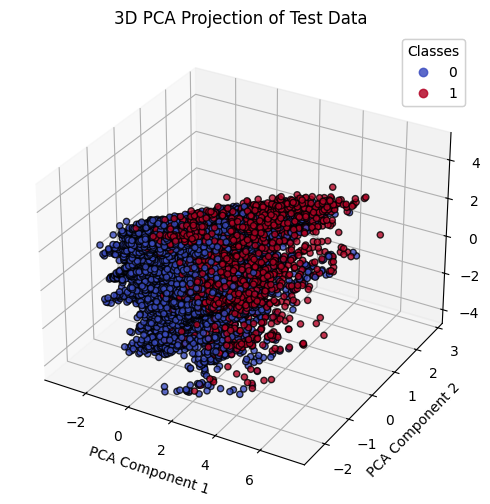

In [185]:
# 1) Reduce dimensionality to 3 components using PCA
pca_3d = PCA(n_components=3)
X_test_pca_3d = pca_3d.fit_transform(X_test_scaled)

# 2) Create 3D scatter plot
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')

# 3) Plot the points
scatter = ax.scatter(
    X_test_pca_3d[:, 0],
    X_test_pca_3d[:, 1],
    X_test_pca_3d[:, 2],
    c=y_test,
    cmap=plt.cm.coolwarm,
    edgecolor="k",
    alpha=0.8
)

# 4) Labels and title
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Projection of Test Data")

# 5) Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

#### Interpretation of the PCA Decision Boundary Visualization

- This visualization shows the decision boundary of a logistic regression model trained on the 2D PCA projection of the data.
- The PCA reduces the original 13 features into 2 synthetic components that capture the most important variance.
- The colored background areas indicate the model's predicted class:
  - Blue area: predicted as "No Diabetes"
  - Red area: predicted as "Diabetes"
- Each point represents a test sample:
  - Blue point: true class = "No Diabetes"
  - Red point: true class = "Diabetes"
- The separation is not perfect because reducing 13 dimensions to 2 inevitably causes information loss.
- Some diabetic cases (red dots) fall inside the blue area, meaning they were misclassified.
- Likewise, some non-diabetic cases appear in the red area.
- The model's accuracy on this simplified 2D representation is lower than in full dimension, which is expected.
- This plot is useful for illustrating the concept of a decision boundary, but it is not used to evaluate the real performance of the model.

#### Exercise 6 : ROC Curve

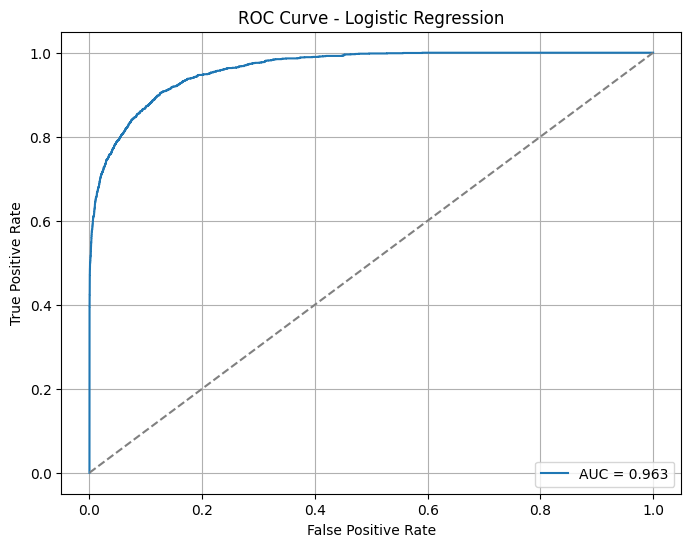

In [186]:
# 1) Get prediction probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

# 2) Compute the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# 3) Compute the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# 4) Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### Interpretation of the ROC Curve

- The ROC curve displays the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1 - specificity) across all possible thresholds.
- The blue curve hugs the top-left corner, indicating excellent performance.
- The diagonal dashed line represents random guessing (AUC = 0.5).
- The Area Under the Curve (AUC) is **0.963**, which is very high.
  - AUC = 1 means perfect classification.
  - AUC = 0.5 means the model performs no better than random guessing.
- An AUC of 0.963 confirms that the model discriminates very well between diabetic and non-diabetic cases.
- This means the logistic regression model has excellent ability to correctly classify most observations.